In [1]:
# 패션 MNIST 데이터 다운
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data() # load_data 함수는 훈련, 테스트셋 나눠서 줌
# 다운 후 sample_data에서 확인

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, train_target.shape)
# (60000장, 28*28크기)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


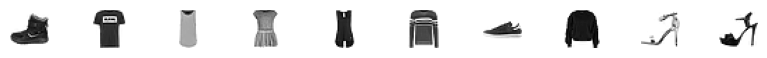

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10, figsize=(10,0.5))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [4]:
print([train_target[i] for i in range(10)])
# 레이블 : 0:티셔츠 1 :바지 2:스웨터 3:드레스 4:코트 5:샌달 6:셔츠 7:스니커즈 8:가방 9:앵클부츠

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [5]:
import numpy as np
print(np.unique(train_target, return_counts = True))
# 각 레이블 별 데이터의 수 출력

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [6]:
train_scaled = train_input/255.0                  # 정규화(픽셀값 0~255)
train_scaled = train_scaled.reshape(-1,28*28)     # 1차원으로 펼치기(SGDClassifier 사용을 위함)
print(train_scaled.shape)

(60000, 784)


In [7]:
# SGDClassifier으로 패션아이템을 분류하고, 교차검증을 수행
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42) # max_iter을 늘리더라도 성능이 크게 향상되지 않음
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(scores)
print()
print(np.mean(scores['test_score'])) # 교차검증 : tarindata에서 일정부분을 뽑아 score을 측정

{'fit_time': array([17.93342495, 17.98943496, 11.36561728, 11.32785535,  7.61867261]), 'score_time': array([0.04379559, 0.05319548, 0.04106975, 0.0637486 , 0.04110336]), 'test_score': array([0.83075   , 0.82025   , 0.82041667, 0.808     , 0.81858333])}

0.8196000000000001


In [8]:
# 인공신경망으로 패션아이템을 분류하기
import tensorflow as tf

In [9]:
from tensorflow import keras

In [10]:
# 딥러닝에서는 교차검증 잘안함
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [11]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [12]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,)) # 밀집층 만들기
model = keras.Sequential(dense)                                          # 신경망 모델 만들기

In [13]:
# 모델을 훈련하기 전에 설정 단계에서 손실함수 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# 원핫인코딩 없이 다중분류 크로스엔트로피, 정확도 변수 함께 출력하기

In [14]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6111 - accuracy: 0.7918
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4758 - accuracy: 0.8379
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4508 - accuracy: 0.8464
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4377 - accuracy: 0.8523
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4293 - accuracy: 0.8553


In [15]:
model.evaluate(val_scaled, val_target) # 모델 평가하기

375/375 [==============================] - 1s 2ms/step - loss: 0.4368 - accuracy: 0.8518


[0.4367983043193817, 0.8517500162124634]